In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv('../data/Car_sales_transactions.csv')
df.head(3)

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5


In [3]:
df.shape

(7906, 16)

In [4]:
df.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats'],
      dtype='object')

In [5]:
df.describe()

,Sales_ID,Year,Selling_Price,km_Driven,Postal_Code,Seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,503562.180116,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,204939.677172,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,110001.000000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,391510.000000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,524225.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,680001.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,834001.000000,14.000000


In [6]:
df.nunique()

Sales_ID         7906
Name             1982
Year               27
Selling_Price     670
km_Driven         898
City_Code          29
State_Code         18
Postal_Code        61
Fuel                4
Seller_Type         3
Transmission        2
Owner               5
Mileage           393
Engine            121
Max_Power         320
Seats               9
dtype: int64

In [7]:
main_categorical_col = ['Fuel','Seller_Type','Transmission','Owner']

for col in main_categorical_col:
    print(f"-----{col}------")
    print(df[col].value_counts())
    print()

-----Fuel------
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: Fuel, dtype: int64

-----Seller_Type------
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: Seller_Type, dtype: int64

-----Transmission------
Manual       6865
Automatic    1041
Name: Transmission, dtype: int64

-----Owner------
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: Owner, dtype: int64



<h1>DATA CLEANING</h1>

In [8]:
df.isnull().sum()

Sales_ID         0
Name             0
Year             0
Selling_Price    0
km_Driven        0
City_Code        0
State_Code       0
Postal_Code      0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage          0
Engine           0
Max_Power        0
Seats            0
dtype: int64

In [9]:
df.Seats.describe()

count    7906.000000
mean        5.416393
std         0.959208
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: Seats, dtype: float64

In [10]:
df[df.Seats > 9][:4]

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
585,605,Tata Sumo CX 10 Str BSIV,2011,175000,20000,CT17,ST07,391510,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,10
768,796,Chevrolet Tavera Neo 3 LS 10 Str,2016,409999,60000,CT17,ST07,391510,Diesel,Individual,Manual,Second Owner,12.2 kmpl,1994 CC,105.3 bhp,10
2025,2087,Tata Sumo EX 10/7 Str BSIII,2012,200000,67500,CT23,ST12,574142,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,10
2257,2332,Chevrolet Tavera Neo 3 10 Seats BSIII,2014,600000,110000,CT18,ST21,141003,Diesel,Individual,Manual,First Owner,13.58 kmpl,2499 CC,72.4 bhp,10


In [11]:
df[df.Seats == 14]

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
4441,4576,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,CT06,ST22,302029,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,14


- Thers is no outliers in case of <b>Seats</b>. And there exist some car models whose seating capcity is upto 14

<h1>DATA TRANSFORMATION</h1>

In [12]:
df2 = df.copy()

In [13]:
df2['Brand_name'] = df.Name.apply(lambda x : x.split(' ')[0])
df2['Model_name'] = df.Name.apply(lambda x : x.split(' ')[1])

In [14]:
df2.Brand_name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

<h3> Converting Models with lesser car to other Category

In [15]:
df2.Model_name = df2.Model_name.apply(lambda x : x.strip())
Model_stats = df2.groupby('Model_name')['Model_name'].agg('count').sort_values(ascending=False)
Model_stats

Model_name
Swift          729
Alto           418
i20            341
Wagon          282
Innova         235
              ... 
Winger           1
S90              1
Spacio           1
Trailblazer      1
X5               1
Name: Model_name, Length: 197, dtype: int64

In [16]:
Model_stats.describe()

count    197.000000
mean      40.131980
std       77.115358
min        1.000000
25%        4.000000
50%       13.000000
75%       45.000000
max      729.000000
Name: Model_name, dtype: float64

In [17]:
print(len(Model_stats[Model_stats <= 5]))
Model_stats_less_than_5 = Model_stats[Model_stats <= 5]
Model_stats_less_than_5

62


Model_name
Fluence        5
Avventura      5
M-Class        5
Ssangyong      5
Passat         5
              ..
Winger         1
S90            1
Spacio         1
Trailblazer    1
X5             1
Name: Model_name, Length: 62, dtype: int64

In [18]:
df2.Model_name = df2.Model_name.apply(lambda x : 'other' if x in Model_stats_less_than_5 else x)
len(df2.Model_name.unique())

136

In [19]:
df2.Mileage[:7]

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
5    20.14 kmpl
6    17.3 km/kg
Name: Mileage, dtype: object

In [20]:
def convert_token_to_num(x):
    tokens = x.split(' ')
    if(len(tokens) == 2):
        return float(tokens[0])

In [21]:
df2['Mileage'] = df2['Mileage'].apply(convert_token_to_num)
df2.Mileage.head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: Mileage, dtype: float64

In [22]:
df2.Max_Power.head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: Max_Power, dtype: object

In [23]:
df2['Max_Power'] = df2['Max_Power'].apply(convert_token_to_num)
df2.Max_Power.head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: Max_Power, dtype: float64

In [24]:
df2['Engine'] = df2['Engine'].apply(convert_token_to_num).astype(int)
df2.Engine.head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: Engine, dtype: int32

In [25]:
df2.Mileage.describe()

count    7906.000000
mean       19.419861
std         4.036263
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: Mileage, dtype: float64

In [211]:
print("Zero Mileage = ",df2.query("Mileage == 0.0")['Mileage'].count())
print("Zero Engine = ",df2.query("Engine == 0.0")['Engine'].count())
print("Zero Max_Power = ",df2.query("Max_Power == 0.0")['Max_Power'].count())

Zero Mileage =  17
Zero Engine =  0
Zero Max_Power =  0


In [212]:
# handling the zero mileage rows
df2.Mileage = df2.Mileage.map(lambda x : x if x!=0.0 else df2.Mileage.median())
print("Zero Mileage = ",df2.query("Mileage == 0.0")['Mileage'].count())

Zero Mileage =  0


In [213]:
df2.Owner = df2.Owner.apply(lambda x : x.split(' ')[0])

In [214]:
current_year = 2023
df2['car_age'] = current_year - df2['Year']

<h3> Finding city name according and city code

In [215]:
city_df = pd.read_excel('/kaggle/input/car-sales1/City_Master.xlsx')
print(city_df.shape)
city_df.head()

(29, 3)


,City_Code,City_Name,State_Code
0,CT01,Mumbai,ST15
1,CT02,Pune,ST15
2,CT03,Chennai,ST24
3,CT04,Coimbatore,ST24
4,CT05,Hyderabad,ST25


In [216]:
city_df.drop(['State_Code'], axis=1, inplace=True)

In [217]:
city_label = {i:j for i,j in zip(city_df['City_Code'],city_df['City_Name'])}
city_label

{'CT01': 'Mumbai',
 'CT02': 'Pune',
 'CT03': 'Chennai',
 'CT04': 'Coimbatore',
 'CT05': 'Hyderabad',
 'CT06': 'Jaipur',
 'CT07': 'Kochi',
 'CT08': 'Kolkata',
 'CT09': 'Delhi',
 'CT10': 'Bangalore',
 'CT11': 'Ahmedabad',
 'CT12': 'Noida',
 'CT13': 'Patna',
 'CT14': 'Surat',
 'CT15': 'Bhubaneshwar',
 'CT16': 'Gangtok',
 'CT17': 'Vadodara',
 'CT18': 'Ludhiana',
 'CT19': 'Mysore',
 'CT20': 'kanpur',
 'CT21': 'Dehradun',
 'CT22': 'Indore',
 'CT23': 'Mangalore',
 'CT24': 'Thrissur',
 'CT25': 'Nellore',
 'CT26': 'Aurangabad',
 'CT27': 'Jamshedpur',
 'CT28': 'Ranchi',
 'CT29': 'Vellore'}

In [218]:
df2['City'] = df2['City_Code'].map(city_label)

<h3>Finding city name according and city code</h3> 

In [219]:
State_df = pd.read_excel('/kaggle/input/car-sales2/State_Master.xlsx')
print(State_df.shape)
State_df.head()

(36, 2)


,State_Code,State_Name
0,ST01,Andhra Pradesh
1,ST02,Arunachal Pradesh
2,ST03,Assam
3,ST04,Bihar
4,ST05,Chhattisgarh


In [220]:
State_label = {i:j for i,j in zip(State_df['State_Code'],State_df['State_Name'])}
df2['State'] = df2['State_Code'].map(State_label)

<h3>Creting a Feature Region using region state mapping

In [221]:
region_df = pd.read_excel('/kaggle/input/region-state/Region_State_Mapping.xlsx')
print(region_df.shape)
region_df.head()

(36, 2)


,Region_Code,State_Code
0,R4,ST01
1,R6,ST02
2,R6,ST03
3,R2,ST04
4,R1,ST05


In [222]:
region_label = {i:j for i,j in zip(region_df['State_Code'],region_df['Region_Code'])}
df2['Region'] = df2['State_Code'].map(region_label)

<h3>Region mapping
    

In [223]:
region_df = pd.read_excel('/kaggle/input/region/Region_Master.xlsx')
print(region_df.shape)
region_df.head()

(6, 2)


,Region_Code,Region
0,R1,Central
1,R2,East
2,R3,West
3,R4,South
4,R5,North


In [224]:
region_label = {i:j for i,j in zip(region_df['Region_Code'],region_df['Region'])}
df2['Region'] = df2['Region'].map(region_label)

<h3>Dropping State_Code and City_Code columns

In [225]:
df2.drop(['State_Code','City_Code'], axis=1, inplace=True)

In [226]:
df2.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats,Brand_name,Model_name,car_age,City,State,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,400001,Diesel,Individual,Manual,First,23.40,1248,74.00,5,Maruti,Swift,9,Mumbai,Maharashtra,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,834001,Diesel,Individual,Manual,Second,21.14,1498,103.52,5,Skoda,Rapid,9,Ranchi,Jharkhand,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,201301,Petrol,Individual,Manual,Third,17.70,1497,78.00,5,Honda,City,17,Noida,Uttar Pradesh,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,248001,Diesel,Individual,Manual,First,23.00,1396,90.00,5,Hyundai,i20,13,Dehradun,Uttarakhand,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,600020,Petrol,Individual,Manual,First,16.10,1298,88.20,5,Maruti,Swift,16,Chennai,Tamil Nadu,South


<h1>DATA VISUALIZATION</h1>

<h5>Quantitive Columns Plotting</h5>

/tmp/ipykernel_33/2651730952.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/2651730952.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/2651730952.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/2651730952.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/2651730952.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/2651730952.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


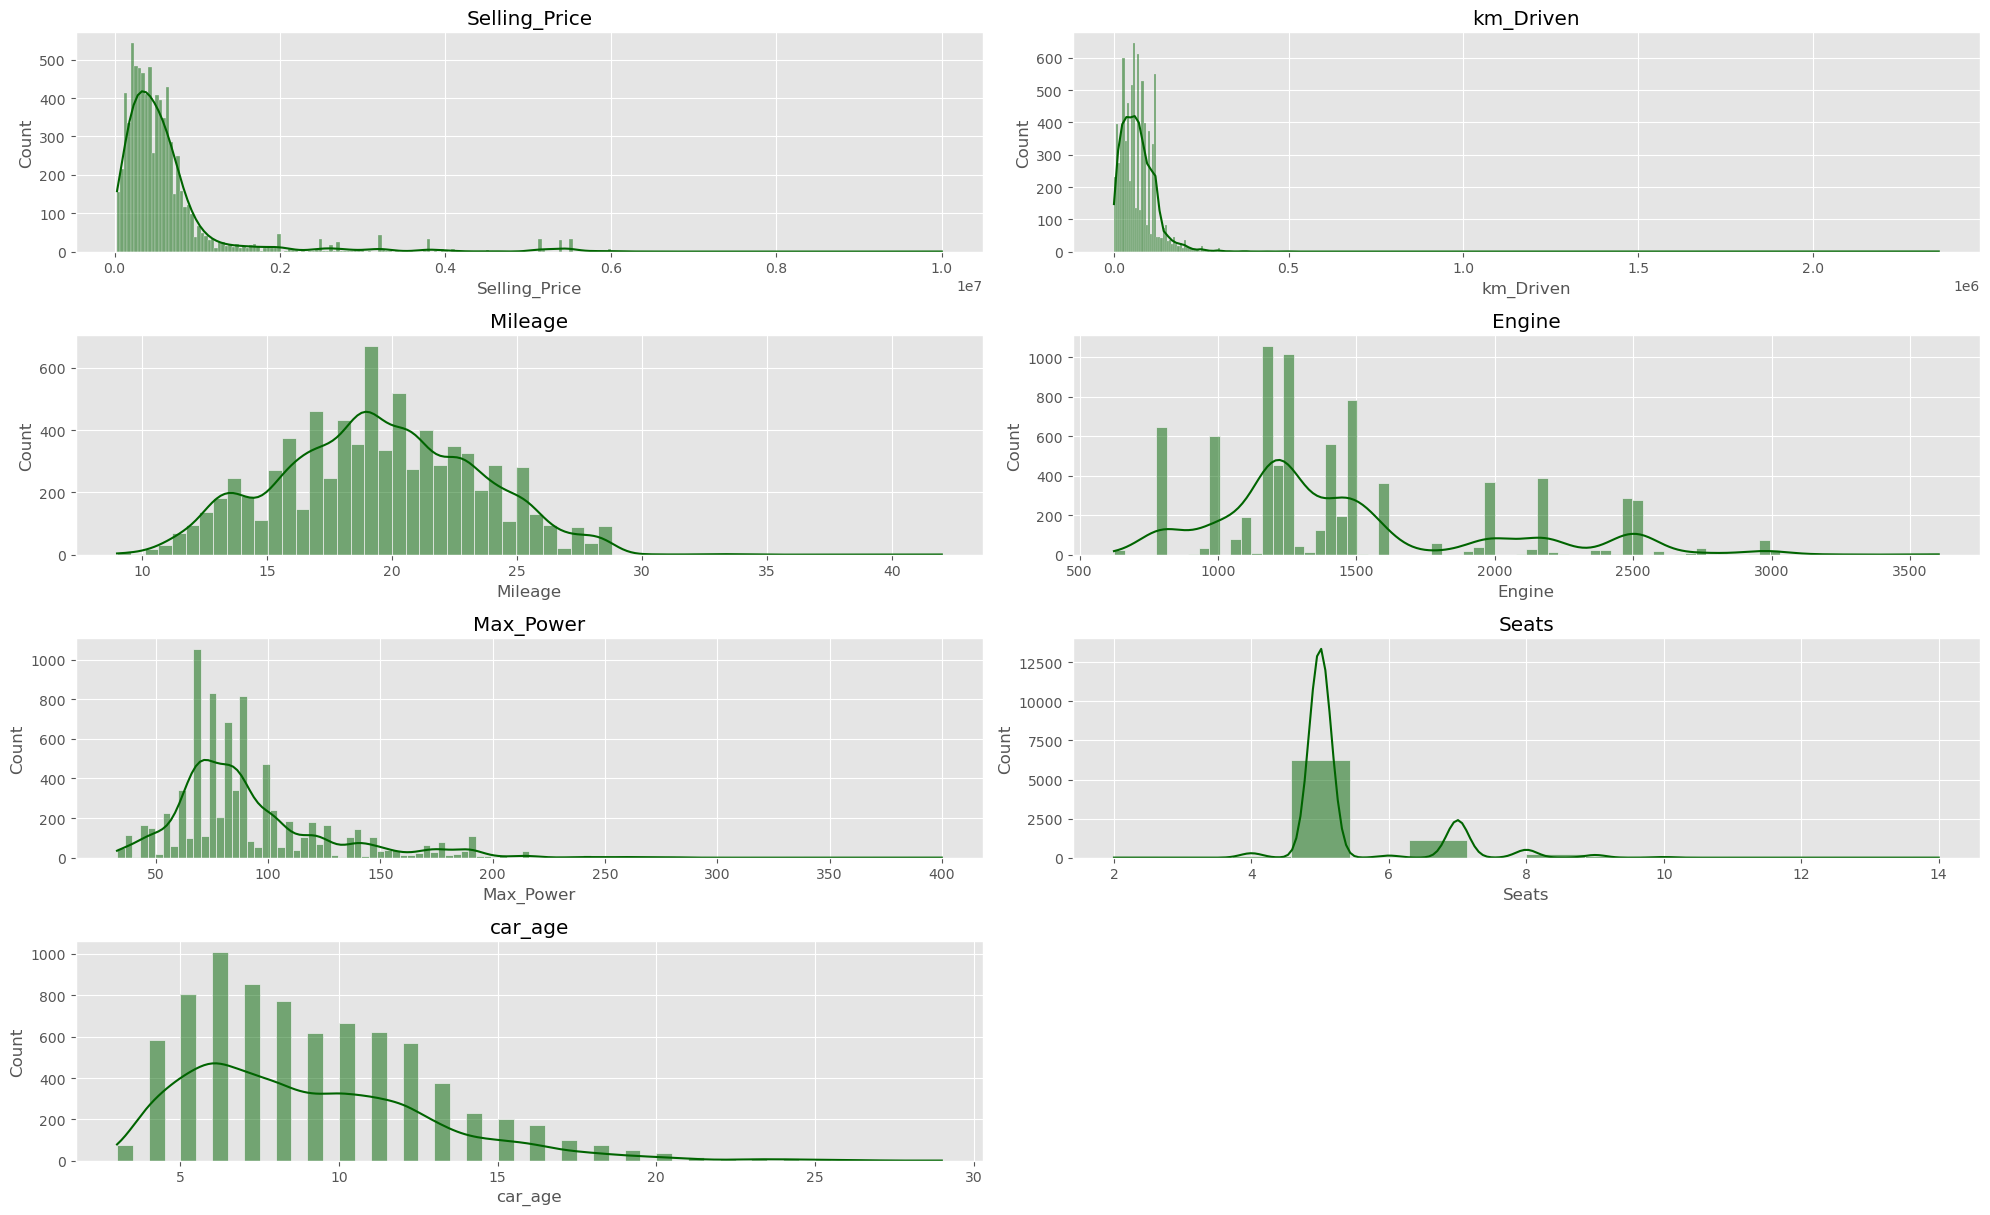

In [227]:
plt.style.use('ggplot')

columns = ['Selling_Price','km_Driven','Mileage','Engine','Max_Power','Seats','car_age']
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
    plt.subplot(10,2,i+1)
    sn.histplot(df2[variable],kde=True,color='darkgreen')
    plt.tight_layout()
    plt.title(variable)

- Selling Price, km_Driven, Max_Power, Engine and Car_age are right skewed
- Mileage is Normally distributed

<h5>Categorical Columns Plotting</h5>

/tmp/ipykernel_33/871979691.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/871979691.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/871979691.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/871979691.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/871979691.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_33/871979691.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


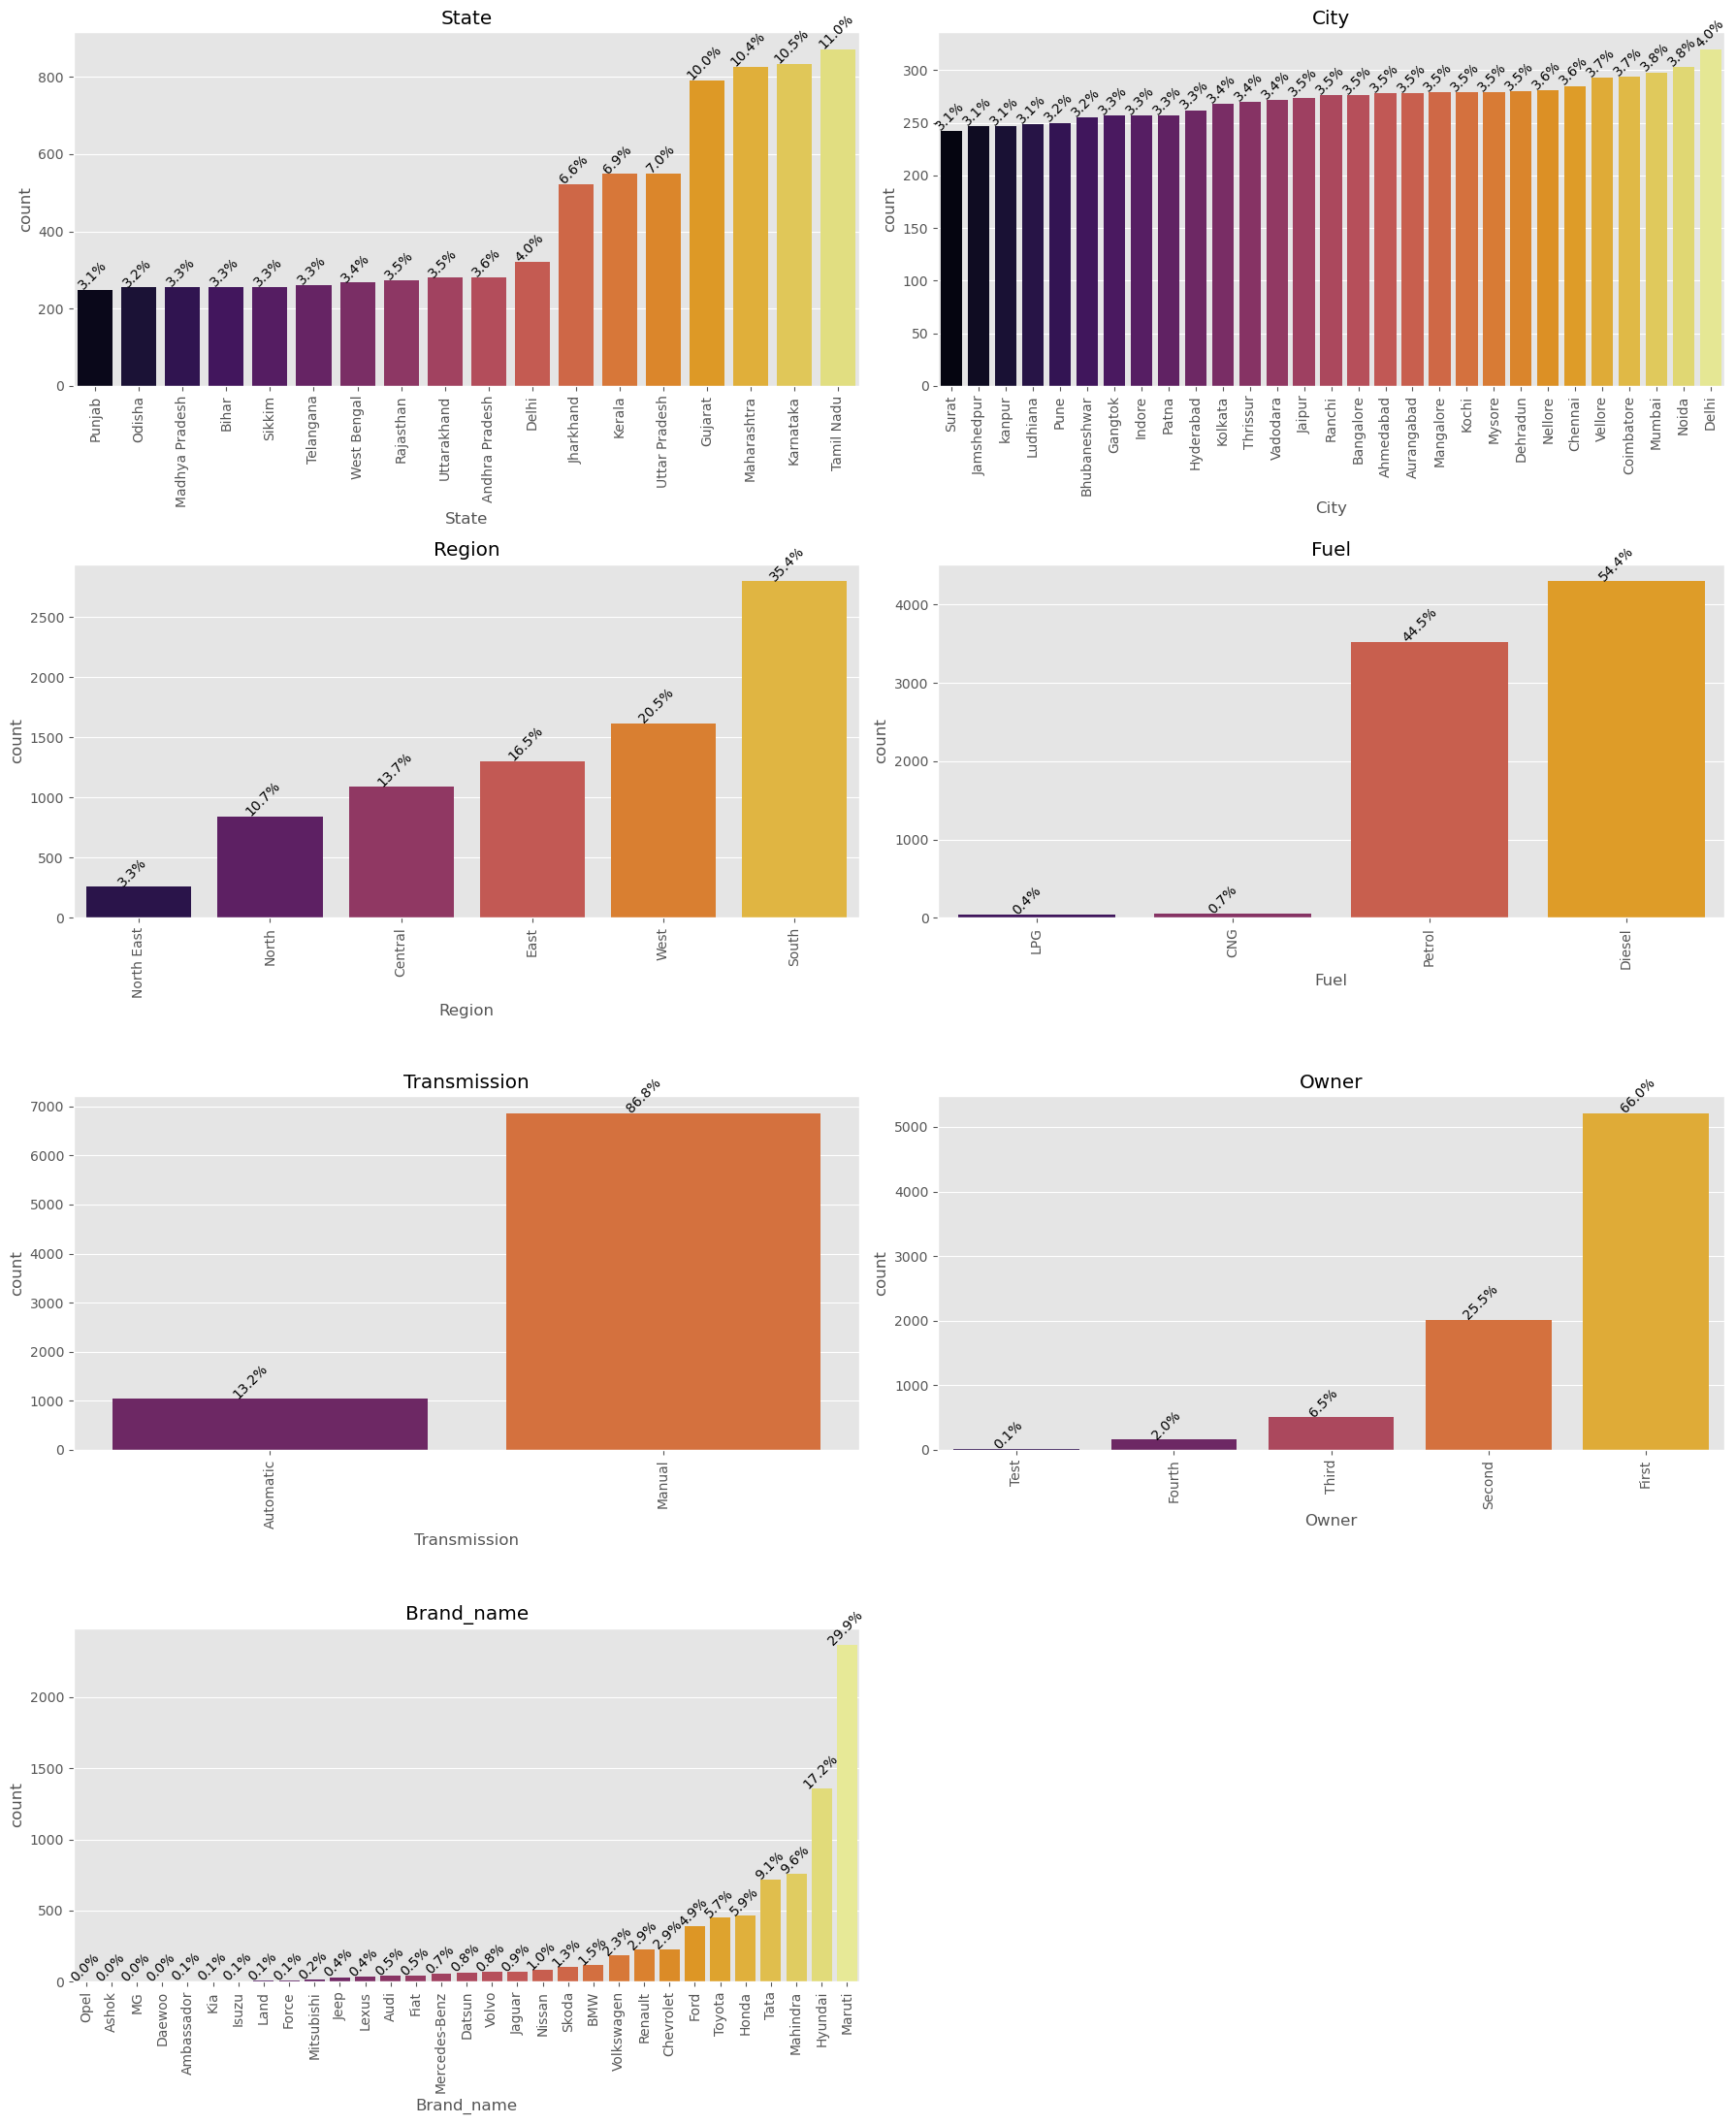

In [228]:
plt.figure(figsize=(18,22))
categorical_columns=['State','City','Region','Fuel','Transmission', 'Owner', 'Brand_name'] 


for i, variable in enumerate(categorical_columns):
                     plt.subplot(4,2,i+1)
                     order = df2[variable].value_counts(ascending=True).index    
                     ax = sn.countplot(x=df2[variable], data=df2 , order=order, palette="inferno")
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df2[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height() +1
                           plt.annotate(percentage, (x, y),ha='center', rotation=45)
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

- more than 10% of cars are sold in each state of Tamil Nadu, Karnataka, Maharastra, Gujrat
- 35% cars are sold in the <b>South Region</b> follwed by the <b>West Region</b>
- 30% of car sold are of Maruti
- 66% of the cars sold are first owner
- 86.9% of the cars sold are of manual transmission
- 54% of the cars are deseil and 44.5% are Petrol

In [229]:
# plt.figure(figsize=(15,25))
# curated_col = ['Brand_name','car_age','km_Driven','Fuel','Seller_Type','Transmission','Owner','Engine','Max_Power','Seats']

# for i, variable in enumerate(curated_col):
#                      plt.subplot(5,3,i+1)
#                      sn.scatterplot(x=df2[variable],y=df2['Selling_Price'], color='darkblue').set(title='Selling_Price vs '+ variable)
#                      plt.tight_layout()

<h1>EDA</h1>

<Axes: xlabel='Seats', ylabel='Selling_Price'>

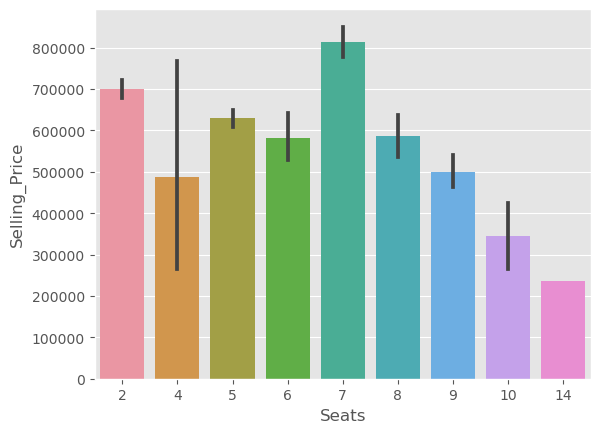

In [230]:
sn.barplot(x='Seats', y='Selling_Price', data=df2)

<Axes: xlabel='Selling_Price', ylabel='City'>

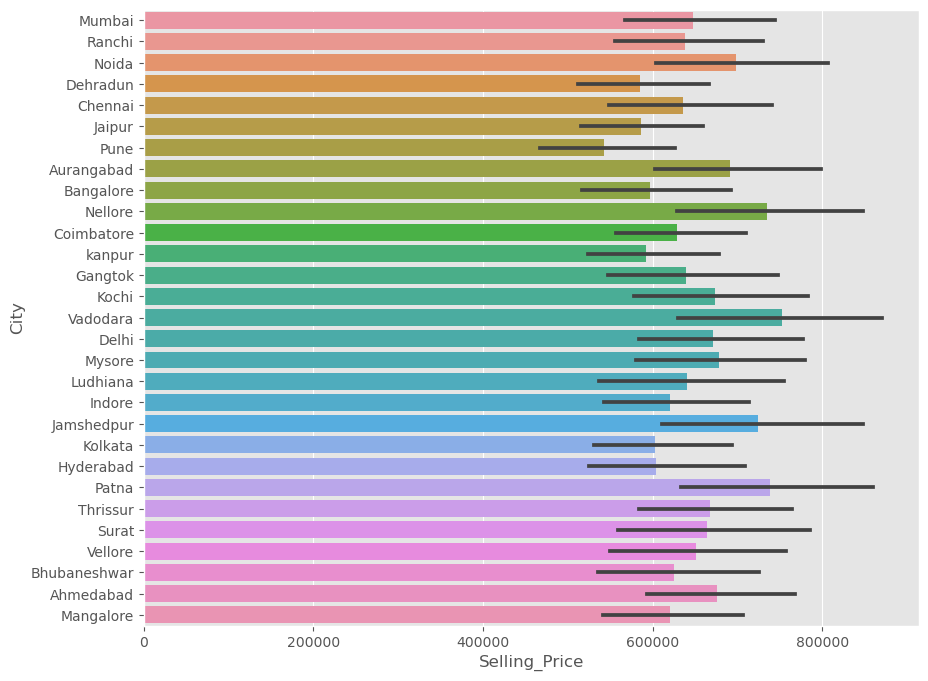

In [231]:
plt.figure(figsize=(10,8))
sn.barplot(x='Selling_Price', y='City', data=df2)

<Axes: xlabel='Selling_Price', ylabel='State'>

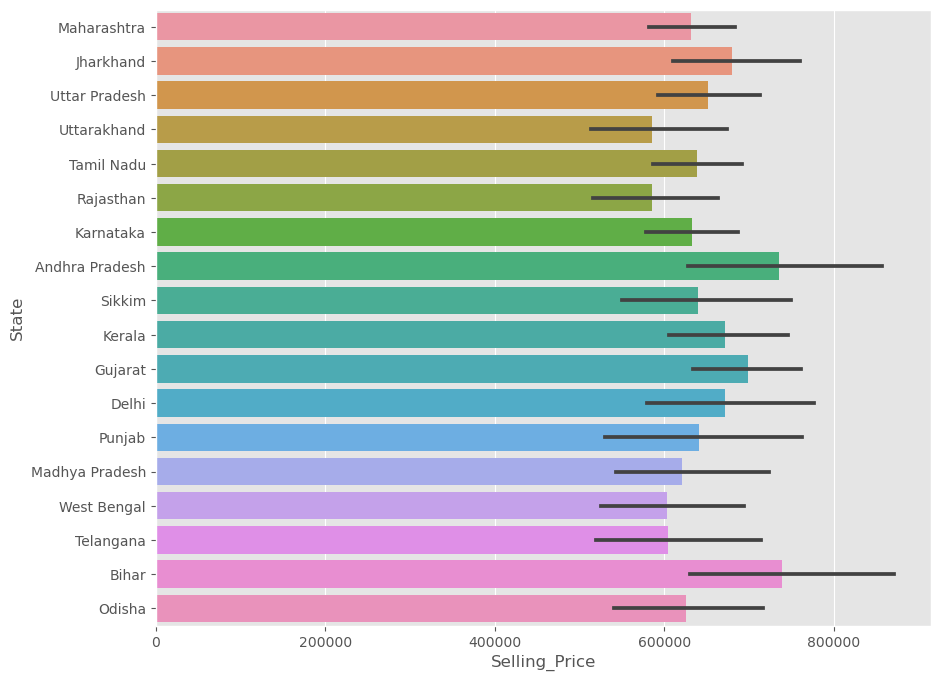

In [232]:
plt.figure(figsize=(10,8))
sn.barplot(x='Selling_Price', y='State', data=df2)

<Axes: xlabel='Selling_Price', ylabel='Region'>

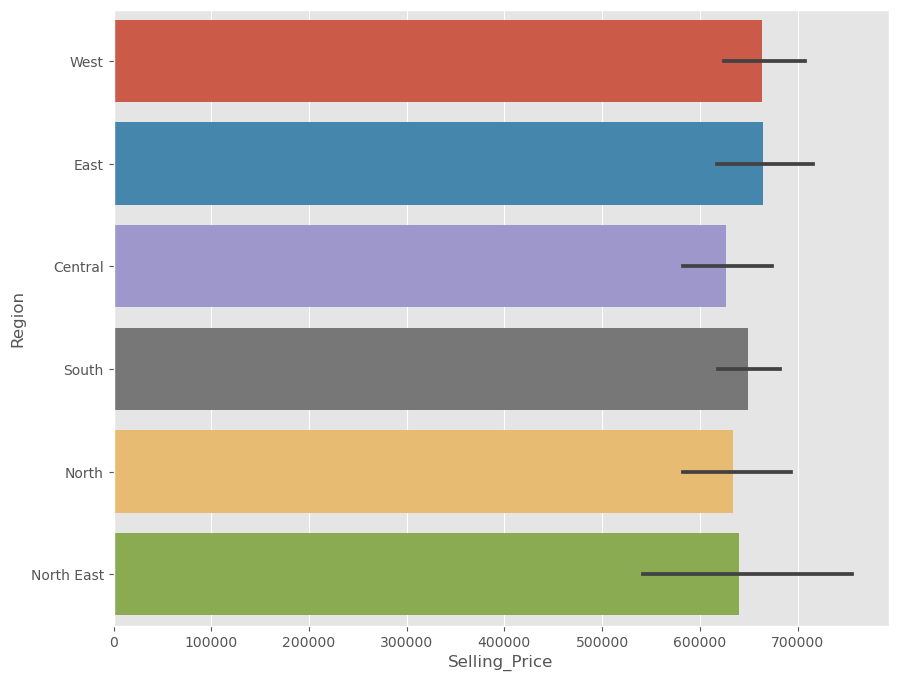

In [233]:
plt.figure(figsize=(10,8))
sn.barplot(x='Selling_Price', y='Region', data=df2)

<Axes: xlabel='Mileage', ylabel='Selling_Price'>

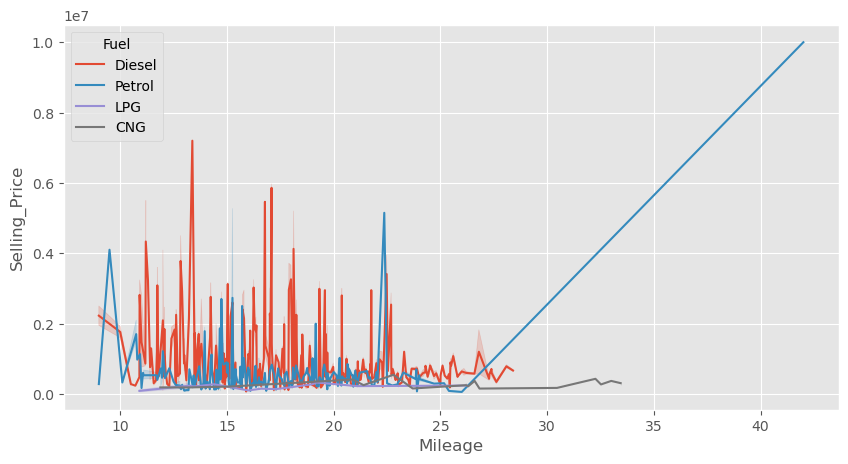

In [234]:
plt.figure(figsize=(10,5))
sn.lineplot(data=df2, y='Selling_Price',x='Mileage',hue='Fuel')

<Axes: xlabel='Year', ylabel='Selling_Price'>

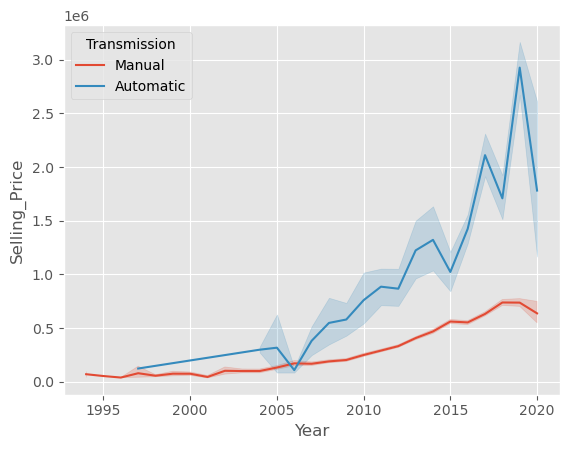

In [235]:
sn.lineplot(x='Year', y='Selling_Price',hue='Transmission',data=df2)

<Axes: xlabel='Mileage', ylabel='Selling_Price'>

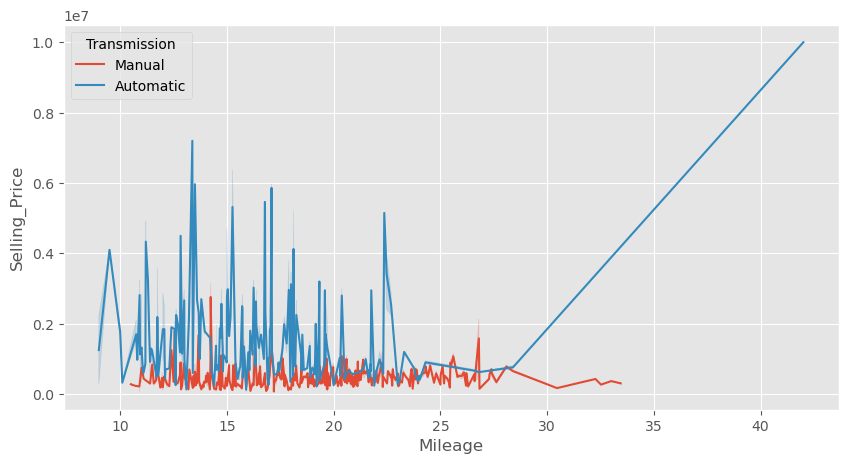

In [236]:
plt.figure(figsize=(10,5))
sn.lineplot(data=df2, y='Selling_Price',x='Mileage',hue='Transmission')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


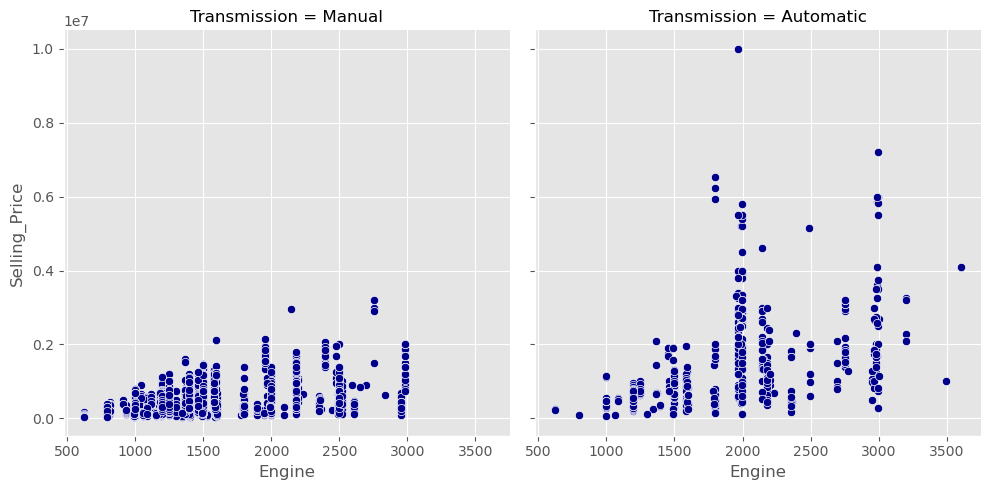

In [237]:
sn.relplot(data=df2, y='Selling_Price',x='Engine', col='Transmission', color='darkblue')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


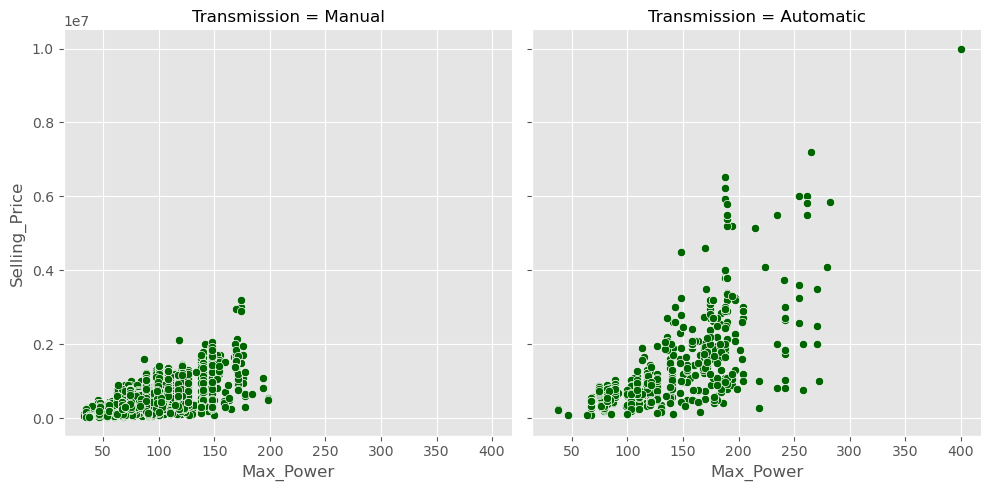

In [238]:
sn.relplot(data=df2, y='Selling_Price',x='Max_Power', col='Transmission', color='darkgreen')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


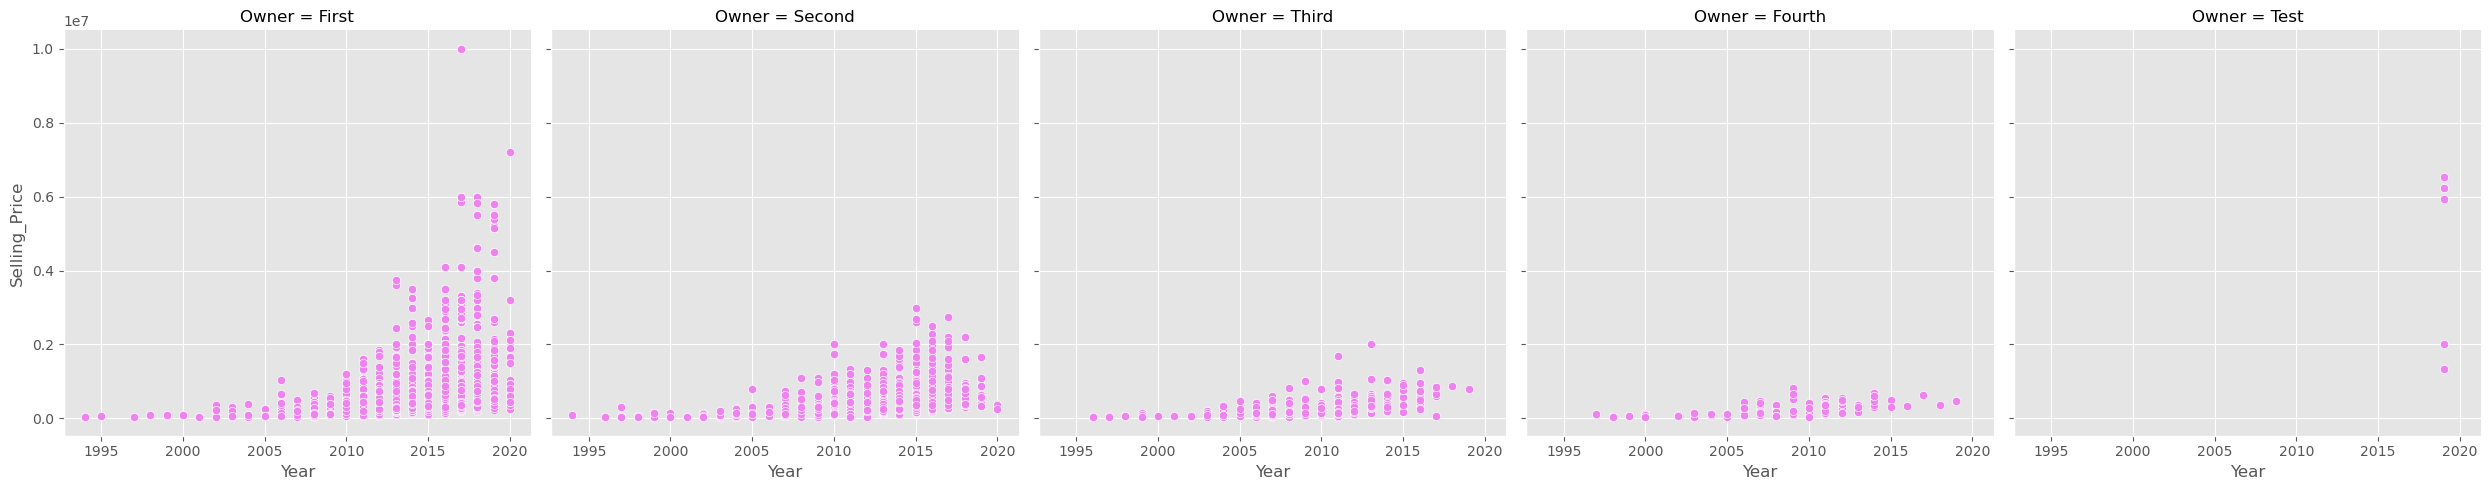

In [239]:
sn.relplot(data=df2, y='Selling_Price',x='Year', col='Owner', color='violet')

- Selling Price of 7 seater cars are more and density of 4 seater are more
- Selling Price of Automatic cars are more and Mileage range of Manual cars are more
- Selling Price of Diesel cars are more but mileage of Petrol cars are more
- Location (Region, State & City) do not affect much on Selling Price
- More the owners less is the Selling Price
- less kilometer the car has run more is the Selling Price
- car's age, Engine, Mileage, Seats, Owner, Transmission, km_Driven affects most on Selling Price.

<h3>Correlation Matrix</h3>

/tmp/ipykernel_33/3436196891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


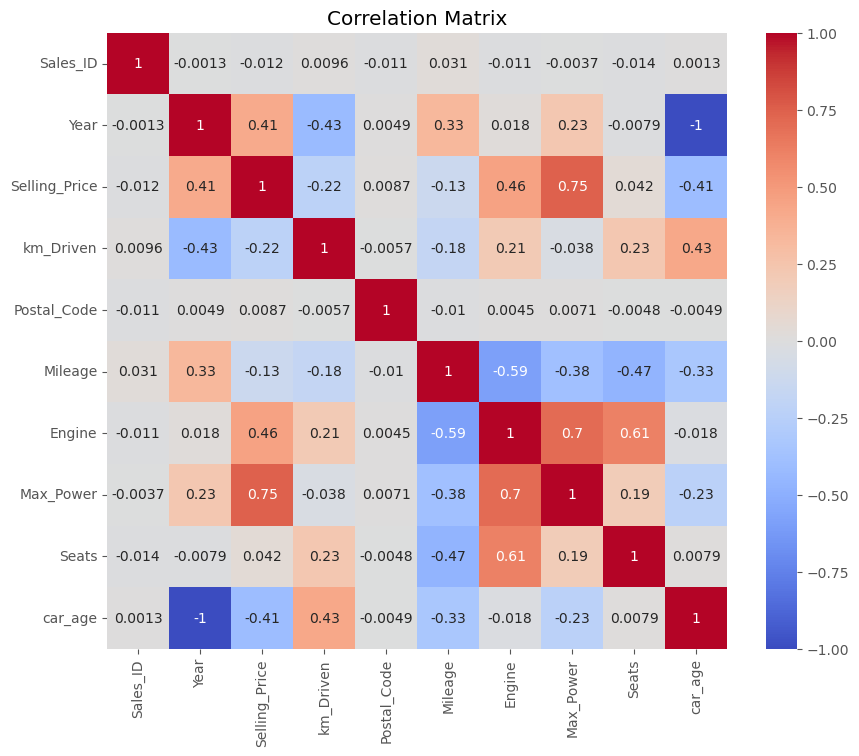

In [240]:
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [241]:
target_column = 'Selling_Price'

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Find the correlation with the target column
correlation_with_target_column = correlation_matrix[target_column].drop(target_column)

# Find the top correlated columns
top_correlated_columns = correlation_with_target_column.abs().nlargest(7)

print("Top correlated columns with", target_column, ":")
print(top_correlated_columns)


Top correlated columns with Selling_Price :
Max_Power    0.749674
Engine       0.455682
Year         0.412302
car_age      0.412302
km_Driven    0.222158
Mileage      0.128720
Seats        0.041617
Name: Selling_Price, dtype: float64


/tmp/ipykernel_33/2328014619.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


In [242]:
df3 = df2.drop(['Sales_ID','Name','Year','Postal_Code'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  7906 non-null   int64  
 1   km_Driven      7906 non-null   int64  
 2   Fuel           7906 non-null   object 
 3   Seller_Type    7906 non-null   object 
 4   Transmission   7906 non-null   object 
 5   Owner          7906 non-null   object 
 6   Mileage        7906 non-null   float64
 7   Engine         7906 non-null   int64  
 8   Max_Power      7906 non-null   float64
 9   Seats          7906 non-null   int64  
 10  Brand_name     7906 non-null   object 
 11  Model_name     7906 non-null   object 
 12  car_age        7906 non-null   int64  
 13  City           7906 non-null   object 
 14  State          7906 non-null   object 
 15  Region         7906 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 988.4+ KB


<h1>FEATURE SELECTION</h1>

In [243]:
cat_cols = [
 'Fuel',
 'Seller_Type',
 'Transmission',
 'Owner',
 'Brand_name',
 'Model_name',
'City',
'State',
'Region']

for col in cat_cols:
    col_dict = df3[col].value_counts().to_dict()
    col_label = {k:i for i,k in enumerate(col_dict.keys())}
    df3[col] = df3[col].map(col_label)



In [244]:
df3.head()

,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats,Brand_name,Model_name,car_age,City,State,Region
0,450000,145500,0,0,0,0,23.40,1248,74.00,5,0,0,9,2,2,1
1,370000,120000,0,0,0,1,21.14,1498,103.52,5,11,34,9,14,6,2
2,158000,140000,1,0,0,2,17.70,1497,78.00,5,4,8,17,1,4,3
3,225000,127000,0,0,0,0,23.00,1396,90.00,5,1,2,13,7,9,3
4,130000,120000,1,0,0,0,16.10,1298,88.20,5,0,0,16,5,0,0


In [245]:
df3.columns

Index(['Selling_Price', 'km_Driven', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats', 'Brand_name',
       'Model_name', 'car_age', 'City', 'State', 'Region'],
      dtype='object')

In [246]:
X = df3.drop(['Selling_Price'], axis=1)
y = df3['Selling_Price']

In [247]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

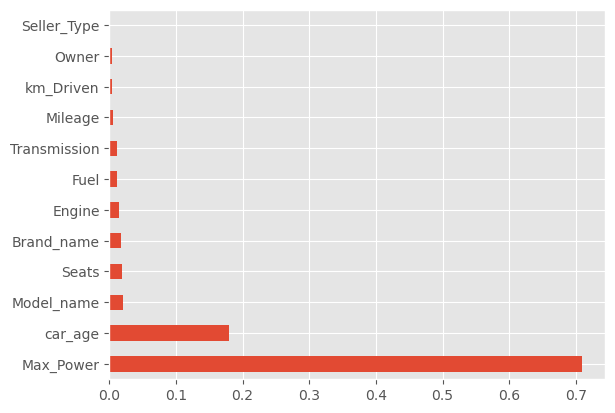

In [248]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

<h3>Taking top 12 important fetaures

In [249]:
df4 = df3.drop(['Region','State','City'], axis=1)

In [250]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Assuming your dataframe is named 'df'

# # Min-Max Scaling
# min_max_scaler = MinMaxScaler()
# df_scaled_min_max = pd.DataFrame(min_max_scaler.fit_transform(df4), columns=df4.columns)

# # Standard Scaling (Z-score Scaling)
# # standard_scaler = StandardScaler()
# # df_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)


In [251]:
# df_scaled_min_max.head()

In [252]:
X = df4.drop(['Selling_Price'], axis=1)
y = df4['Selling_Price']

In [253]:
# priceMean = y.mean()
# priceStd = y.std()
# y = (y-priceMean)/priceStd

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (6324, 12)
Input Test: (1582, 12)
Output Training: (6324,)
Output Test: (1582,)


In [255]:
X_train.head()

,km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats,Brand_name,Model_name,car_age
281,35000,1,0,0,0,18.90,1197,82.00,5,1,7,6
6472,90000,0,0,0,0,12.99,2494,100.60,8,5,4,8
4690,25538,1,2,0,0,16.78,1496,88.73,5,5,25,6
4427,8588,1,0,0,0,22.00,1197,81.80,5,0,0,7
1598,110000,0,0,0,0,26.59,1248,74.00,5,0,0,8


In [256]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.6873207679842737

In [257]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.68587393, 0.69628492, 0.68313028, 0.62701471, 0.68571346])

In [258]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=30, max_depth=20)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9510604126121981

In [259]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9541723689844565

In [260]:
from sklearn.svm import SVR
model = SVR(C=1.0, epsilon=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.053227584746391665

<h3>Three models perform well on this dataset</h3>
<h4>- Random Forest Regressor</h4>
<h4>- Decision Tree regressor</h4>
<h4>- XGBoost Regressor</h4>

<h3>Choosing the best modle using GridSearchCV

In [266]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler.fit_transform(df4), columns=df4.columns)

X_scaled = df_scaled_standard.drop(['Selling_Price'], axis=1)
y_scaled = df_scaled_standard['Selling_Price']

def find_best_model_using_GSV(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_Forest': {
            'model': RandomForestRegressor(),
            'params':{
                'n_estimators': [10, 50, 100, 150, 200],
                'max_depth': [None, 5, 10, 20, 30, 40]
            }
        },
        'xgb' :{
            'model' : xgb.XGBRegressor(),
            'params':{"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.05,0.1,0.15,0.20]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

results = find_best_model_using_GSV(X_scaled, y_scaled)

In [269]:
results

,model,best_score,best_params
0,decision_tree,0.953962,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,random_Forest,0.968334,"{'max_depth': 40, 'n_estimators': 200}"
2,xgb,0.970640,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est..."


In [270]:
estimators = results['best_params'][2]
estimators

{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 700}

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 700}


<h3> Creating the final model using pipeline

In [279]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


model_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_reg', xgb.XGBRegressor(learning_rate=0.1, max_depth= 4, n_estimators= 700))
])

model_reg.fit(X_train,y_train)


model_reg.score(X_test,y_test)

0.9603255060826749

In [281]:
import joblib
  
# Save the model as a pickle in a file
joblib.dump(model_reg , 'final_model.pkl')

['final_model.pkl']

In [280]:
from sklearn.metrics import r2_score

y_pred = model_reg.predict(X_test)
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9603255060826749


<h3> Finally we have a good r2 score here. and we are good to go for the model 